In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib widget

import importlib
import os
import sys

module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

import ExperimentClass
import tools
import math_functions as mf

In [7]:
path = "C:/Users/Orlando/ownCloud - ORLANDO Marcelo@mycore.cnrs.fr/Doutorado/Dados experimentais/Spectrometer/Phaeodactilum_raphael/"

fig_folder = path + "Figures/"
if not os.path.exists(fig_folder):
    os.makedirs(fig_folder)

phaeo = pd.read_csv(path + "phaeo_raph_marcelo" + ".csv", delimiter=";", decimal=".")


# def normalize_spectra(spectra):
#     spectra_baseline = np.mean(spectra["intensity"][tools.closest_index(spectra["wavelength"], 300):tools.closest_index(spectra["wavelength"], 400)])
#     spectra["intensity"] = spectra["intensity"] - spectra_baseline
#     #spectra["intensity"] = spectra["intensity"] / np.trapz(spectra["intensity"], spectra["wavelength"])
#     spectra["intensity"] = spectra["intensity"] / np.max(spectra["intensity"])
#     return spectra

# actinique_rouge = normalize_spectra(actinique_rouge)
# filter_695 = normalize_spectra(filter_695)
# filter_fluo = normalize_spectra(filter_fluo)

In [8]:
phaeo

,Wavelength (nm),Abs
0,800.000244,0.463698
1,798.991394,0.463321
2,798.016907,0.464665
3,797.007263,0.465100
4,795.997131,0.466772
...,...,...
596,203.980545,0.286441
597,202.989945,0.168693
598,201.999222,0.224527
599,201.008438,0.277857


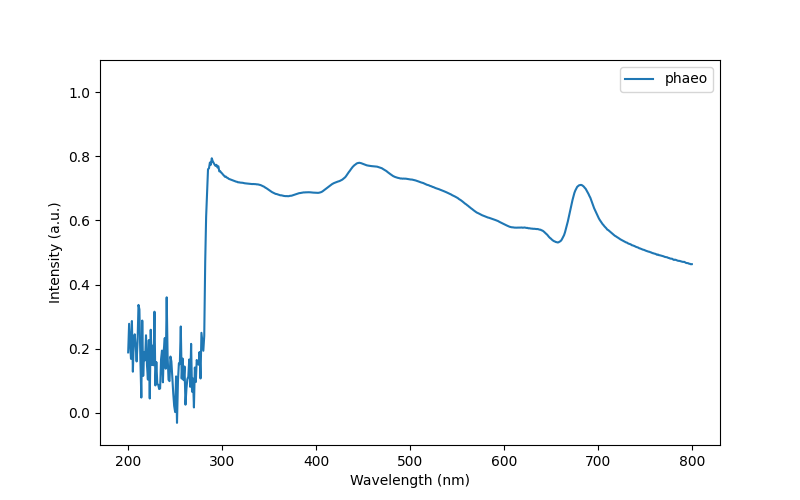

In [10]:

fig, ax = plt.subplots(figsize=(8, 5))
ax.plot(phaeo["Wavelength (nm)"], phaeo["Abs"], label="phaeo")
ax.set_xlabel("Wavelength (nm)")
ax.set_ylabel("Intensity (a.u.)")
ax.legend()
ax.set_ylim(-0.1, 1.1)
fig.savefig(fig_folder + "spectra_filters.png", dpi=300)